In [9]:
import os,sys
import argparse
import copy

import numpy as np
from iminuit import Minuit
import pandas as pd
from scipy import interpolate, integrate
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
import healpy as hp
from tqdm import *

sys.path.append('../')


from local_dirs import *
from minuit_functions import call_ll

# Additional modules
sys.path.append(nptf_old_dir)
sys.path.append(work_dir + '/AccurateSmoothing')
sys.path.append(work_dir + '/mkDMMaps')

import fermi.fermi_plugin as fp
import LL_inten_to_xsec as Litx

# NPTFit modules
from NPTFit import nptfit # module for performing scan
from NPTFit import create_mask as cm # module for creating the mask

In [10]:
from scan_experimental import Scan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
sc =Scan(perform_scan=1, 
    perform_postprocessing=0, 
    imc=-1,
    diff='p8',
    iobj=1, 
    Asimov=0, 
    float_ps_together=0,
    noJprof=0,
    floatDM=1,
    verbose=1,
    emin=0,
     emax=39,
#      load_dir='debugging_highE',
    save_dir='debugging_highE_nosmooth/',
    mc_dm=-1)

../scan_experimental.py:96: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  source_3fg_df = source_3fg_df.convert_objects(convert_numeric=True)
0it [00:00, ?it/s]

At bin 0
DM_intensity_base is 9.76776521475e-12
mean exposure is 1.09618e+11
template mean is 5.08626302083e-06


FCN = 4813.74779574 
 TOTAL NCALL = 2426 
 NCALLS = 2426 
 
 
 EDM = 2.04119624155e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.769801,0.38859,0,0,0.0,50.0,
2,iso,8.50147,2.24833,0,0,0.0,50.0,
3,ps_781,1.4501,0.281648,0,0,0.0,50.0,
4,ps_792,1.4146,1.07816,0,0,0.0,50.0,
5,ps_794,0.400908,2.67497,0,0,0.0,50.0,
6,ps_812,2.68526,1.18707,0,0,0.0,50.0,
7,ps_879,2.1711,1.29714,0,0,0.0,50.0,
8,ps_884,2.49915,2.24353,0,0,0.0,50.0,
9,ps_949,9.71965,11.8689,0,0,0.0,50.0,
10,ps_976,1.24041,1.24835,0,0,0.0,50.0,


1it [00:04,  4.91s/it]

At bin 1
DM_intensity_base is 8.57510276225e-12
mean exposure is 1.24802e+11
template mean is 5.08626302083e-06


FCN = 4664.85109485 
 TOTAL NCALL = 2694 
 NCALLS = 2694 
 
 
 EDM = 0.000145026374751 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.698781,0.350995,0,0,0.0,50.0,
2,iso,6.94546,1.96801,0,0,0.0,50.0,
3,ps_781,1.79232,0.286679,0,0,0.0,50.0,
4,ps_792,1.14973,0.994091,0,0,0.0,50.0,
5,ps_794,1.25172,2.03449,0,0,0.0,50.0,
6,ps_812,2.00984,1.00296,0,0,0.0,50.0,
7,ps_879,2.39929,1.05541,0,0,0.0,50.0,
8,ps_884,2.4908,1.91706,0,0,0.0,50.0,
9,ps_949,2.61926,25.6047,0,0,0.0,50.0,
10,ps_976,1.76252,1.05658,0,0,0.0,50.0,


2it [00:08,  4.64s/it]

At bin 2
DM_intensity_base is 7.51694778069e-12
mean exposure is 1.42415e+11
template mean is 5.08626302083e-06


FCN = 4501.73819817 
 TOTAL NCALL = 1872 
 NCALLS = 1872 
 
 
 EDM = 4.03631787417e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.339287,0.327639,0,0,0.0,50.0,
2,iso,7.76196,1.77248,0,0,0.0,50.0,
3,ps_781,2.60182,0.298122,0,0,0.0,50.0,
4,ps_792,5.81507e-06,2.04132,0,0,0.0,50.0,
5,ps_794,0.814477,1.50096,0,0,0.0,50.0,
6,ps_812,0.871574,0.86636,0,0,0.0,50.0,
7,ps_879,1.97869,0.816409,0,0,0.0,50.0,
8,ps_884,0.000134139,7.80098,0,0,0.0,50.0,
9,ps_949,9.66924,8.99225,0,0,0.0,50.0,
10,ps_976,2.75224e-10,0.333083,0,0,0.0,50.0,


3it [00:12,  4.39s/it]

At bin 3
DM_intensity_base is 6.67963927678e-12
mean exposure is 1.60361e+11
template mean is 5.08626302083e-06


FCN = 4502.95434527 
 TOTAL NCALL = 2094 
 NCALLS = 2094 
 
 
 EDM = 4.2004529304e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.749378,0.265965,0,0,0.0,50.0,
2,iso,4.23456,1.32511,0,0,0.0,50.0,
3,ps_781,2.10364,0.28018,0,0,0.0,50.0,
4,ps_792,1.90885,0.915026,0,0,0.0,50.0,
5,ps_794,1.98097e-06,1.1308,0,0,0.0,50.0,
6,ps_812,0.528111,0.741946,0,0,0.0,50.0,
7,ps_879,1.52303,0.697332,0,0,0.0,50.0,
8,ps_884,2.80868,1.53329,0,0,0.0,50.0,
9,ps_949,8.99039,6.99261,0,0,0.0,50.0,
10,ps_976,2.35275,0.827762,0,0,0.0,50.0,


4it [00:16,  4.24s/it]

At bin 4
DM_intensity_base is 6.02731620991e-12
mean exposure is 1.77825e+11
template mean is 5.08626302083e-06


FCN = 4320.0130161 
 TOTAL NCALL = 3035 
 NCALLS = 3035 
 
 
 EDM = 0.00016768065385 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,1.52892,0.0327516,0,0,0.0,50.0,
2,iso,0.00171949,1.06396,0,0,0.0,50.0,
3,ps_781,1.52778,0.251279,0,0,0.0,50.0,
4,ps_792,1.14032,0.677943,0,0,0.0,50.0,
5,ps_794,0.461047,0.785312,0,0,0.0,50.0,
6,ps_812,1.72835,0.696486,0,0,0.0,50.0,
7,ps_879,1.43884,0.540521,0,0,0.0,50.0,
8,ps_884,0.494388,0.998479,0,0,0.0,50.0,
9,ps_949,1.96127e-07,2.52784,0,0,0.0,50.0,
10,ps_976,0.788768,0.644692,0,0,0.0,50.0,


5it [00:20,  4.22s/it]

At bin 5
DM_intensity_base is 5.49549238269e-12
mean exposure is 1.94979e+11
template mean is 5.08626302083e-06


FCN = 4071.87886184 
 TOTAL NCALL = 2320 
 NCALLS = 2320 
 
 
 EDM = 4.41207976106e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,1.16139,0.289646,0,0,0.0,50.0,
2,iso,1.00412,1.09541,0,0,0.0,50.0,
3,ps_781,1.55621,0.292168,0,0,0.0,50.0,
4,ps_792,1.68818,0.855752,0,0,0.0,50.0,
5,ps_794,2.76956e-07,1.22927,0,0,0.0,50.0,
6,ps_812,0.608441,0.598032,0,0,0.0,50.0,
7,ps_879,1.78561,0.54429,0,0,0.0,50.0,
8,ps_884,2.01364e-07,0.904916,0,0,0.0,50.0,
9,ps_949,2.7556,3.7376,0,0,0.0,50.0,
10,ps_976,1.08264,0.597965,0,0,0.0,50.0,


6it [00:24,  4.16s/it]

At bin 6
DM_intensity_base is 5.11118448218e-12
mean exposure is 2.0979e+11
template mean is 5.08626302083e-06


FCN = 3867.55776283 
 TOTAL NCALL = 2049 
 NCALLS = 2049 
 
 
 EDM = 0.000197975597781 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.662325,0.277464,0,0,0.0,50.0,
2,iso,2.12116,0.879627,0,0,0.0,50.0,
3,ps_781,1.21569,0.269219,0,0,0.0,50.0,
4,ps_792,1.23089,0.7702,0,0,0.0,50.0,
5,ps_794,0.000572535,8.6022,0,0,0.0,50.0,
6,ps_812,1.24547e-06,1.39578,0,0,0.0,50.0,
7,ps_879,1.08324,0.446877,0,0,0.0,50.0,
8,ps_884,0.0453138,4.80287,0,0,0.0,50.0,
9,ps_949,2.72808e-06,2.62524,0,0,0.0,50.0,
10,ps_976,1.63005,0.641084,0,0,0.0,50.0,


7it [00:28,  4.05s/it]

At bin 7
DM_intensity_base is 4.64198268913e-12
mean exposure is 2.3073e+11
template mean is 5.08626302083e-06


FCN = 3601.19083106 
 TOTAL NCALL = 2960 
 NCALLS = 2960 
 
 
 EDM = 9.90634368333e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,1.31689,0.0387806,0,0,0.0,50.0,
2,iso,2.5153e-05,2.26166,0,0,0.0,50.0,
3,DM,2.40323,5.64479,0,0,0.0,1000.0,
4,ps_781,1.53073,0.338961,0,0,0.0,50.0,
5,ps_792,0.897954,0.84157,0,0,0.0,50.0,
6,ps_794,0.948227,0.660325,0,0,0.0,50.0,
7,ps_812,1.68869,0.653469,0,0,0.0,50.0,
8,ps_879,1.44813,0.445156,0,0,0.0,50.0,
9,ps_884,0.151463,1.09211,0,0,0.0,50.0,
10,ps_949,1.10633e-06,3.78102,0,0,0.0,50.0,


8it [00:32,  4.05s/it]

At bin 8
DM_intensity_base is 4.39340437967e-12
mean exposure is 2.43847e+11
template mean is 5.08626302083e-06


FCN = 3316.29477822 
 TOTAL NCALL = 2603 
 NCALLS = 2603 
 
 
 EDM = 0.000456098174963 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,1.30969,0.038251,0,0,0.0,50.0,
2,iso,9.39912e-08,0.723233,0,0,0.0,50.0,
3,DM,1.85528e-08,1.72286,0,0,0.0,1000.0,
4,ps_781,1.05365,0.322682,0,0,0.0,50.0,
5,ps_792,0.51896,0.683363,0,0,0.0,50.0,
6,ps_794,1.06614,0.663527,0,0,0.0,50.0,
7,ps_812,1.87641,0.70378,0,0,0.0,50.0,
8,ps_879,1.43986,0.470088,0,0,0.0,50.0,
9,ps_884,1.53705,1.00638,0,0,0.0,50.0,
10,ps_949,2.04438,2.08992,0,0,0.0,50.0,


9it [00:36,  4.03s/it]

At bin 9
DM_intensity_base is 4.21333953017e-12
mean exposure is 2.54268e+11
template mean is 5.08626302083e-06


FCN = 3055.05498424 
 TOTAL NCALL = 2351 
 NCALLS = 2351 
 
 
 EDM = 4.66481107579e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.667057,0.364091,0,0,0.0,50.0,
2,iso,0.908627,0.551563,0,0,0.0,50.0,
3,DM,0.34012,11.1189,0,0,0.0,1000.0,
4,ps_781,1.69812,0.427801,0,0,0.0,50.0,
5,ps_792,1.058,0.873913,0,0,0.0,50.0,
6,ps_794,1.04937,0.636724,0,0,0.0,50.0,
7,ps_812,1.43863,0.652574,0,0,0.0,50.0,
8,ps_879,0.868182,0.402479,0,0,0.0,50.0,
9,ps_884,0.569618,0.776197,0,0,0.0,50.0,
10,ps_949,2.27076,2.04861,0,0,0.0,50.0,


10it [00:40,  3.98s/it]

At bin 10
DM_intensity_base is 4.13685315622e-12
mean exposure is 2.59051e+11
template mean is 5.08626302083e-06


FCN = 2766.45241498 
 TOTAL NCALL = 2196 
 NCALLS = 2196 
 
 
 EDM = 5.41963518858e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,9.44894e-09,0.19161,0,0,0.0,50.0,
2,iso,1.52112,0.0505947,0,0,0.0,50.0,
3,DM,1.56906,4.20536,0,0,0.0,1000.0,
4,ps_781,1.11725,0.430722,0,0,0.0,50.0,
5,ps_792,6.71199e-08,0.373281,0,0,0.0,50.0,
6,ps_794,0.785073,0.547215,0,0,0.0,50.0,
7,ps_812,0.797255,0.628999,0,0,0.0,50.0,
8,ps_879,1.19894,0.416259,0,0,0.0,50.0,
9,ps_884,0.0560576,1.84637,0,0,0.0,50.0,
10,ps_949,6.81392e-06,1.08684,0,0,0.0,50.0,


11it [00:44,  3.93s/it]

At bin 11
DM_intensity_base is 4.11466628691e-12
mean exposure is 2.6023e+11
template mean is 5.08626302083e-06


FCN = 2334.13230949 
 TOTAL NCALL = 1499 
 NCALLS = 1499 
 
 
 EDM = 1.75989105835e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.79301,0.640525,0,0,0.0,50.0,
2,iso,0.433326,0.516561,0,0,0.0,50.0,
3,DM,1.93206,3.64572,0,0,0.0,1000.0,
4,ps_781,0.656022,0.423937,0,0,0.0,50.0,
5,ps_792,3.06191,1.50734,0,0,0.0,50.0,
6,ps_794,0.281739,0.44413,0,0,0.0,50.0,
7,ps_812,0.477622,0.577295,0,0,0.0,50.0,
8,ps_879,1.11199,0.494273,0,0,0.0,50.0,
9,ps_884,0.679577,0.945245,0,0,0.0,50.0,
10,ps_949,2.991e-08,1.34471,0,0,0.0,50.0,


12it [00:47,  3.85s/it]

At bin 12
DM_intensity_base is 4.11984823583e-12
mean exposure is 2.59943e+11
template mean is 5.08626302083e-06


FCN = 2009.96473396 
 TOTAL NCALL = 2176 
 NCALLS = 2176 
 
 
 EDM = 1.5480638244e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,1.37541,0.0675244,0,0,0.0,50.0,
2,iso,2.4293e-07,0.369731,0,0,0.0,50.0,
3,DM,3.40896,3.93005,0,0,0.0,1000.0,
4,ps_781,0.34683,0.419941,0,0,0.0,50.0,
5,ps_792,1.15789,1.27283,0,0,0.0,50.0,
6,ps_794,0.44812,0.531592,0,0,0.0,50.0,
7,ps_812,1.66494,0.966911,0,0,0.0,50.0,
8,ps_879,1.28202,0.54119,0,0,0.0,50.0,
9,ps_884,1.21622,1.57047,0,0,0.0,50.0,
10,ps_949,0.604299,1.24318,0,0,0.0,50.0,


13it [00:51,  3.80s/it]

At bin 13
DM_intensity_base is 4.18764292718e-12
mean exposure is 2.56039e+11
template mean is 5.08626302083e-06


FCN = 1735.52174702 
 TOTAL NCALL = 1812 
 NCALLS = 1812 
 
 
 EDM = 0.000100707806895 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.265738,0.832155,0,0,0.0,50.0,
2,iso,0.50281,0.321,0,0,0.0,50.0,
3,DM,2.70756,3.25228,0,0,0.0,1000.0,
4,ps_781,0.228436,0.468936,0,0,0.0,50.0,
5,ps_792,1.07905e-10,0.628409,0,0,0.0,50.0,
6,ps_794,0.793959,0.619077,0,0,0.0,50.0,
7,ps_812,0.898703,0.763261,0,0,0.0,50.0,
8,ps_879,1.43971,0.595457,0,0,0.0,50.0,
9,ps_884,8.22675e-12,0.49199,0,0,0.0,50.0,
10,ps_949,3.02768,2.30322,0,0,0.0,50.0,


14it [00:55,  3.74s/it]

At bin 14
DM_intensity_base is 4.22996305931e-12
mean exposure is 2.53491e+11
template mean is 5.08626302083e-06


FCN = 1392.76287576 
 TOTAL NCALL = 2014 
 NCALLS = 2014 
 
 
 EDM = 6.46221634867e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.153305,4.21931,0,0,0.0,50.0,
2,iso,0.373389,0.420543,0,0,0.0,50.0,
3,DM,5.414e-10,1.26918,0,0,0.0,1000.0,
4,ps_781,0.959608,0.790208,0,0,0.0,50.0,
5,ps_792,0.925967,1.46406,0,0,0.0,50.0,
6,ps_794,0.921946,0.717834,0,0,0.0,50.0,
7,ps_812,1.0722,0.98271,0,0,0.0,50.0,
8,ps_879,1.14207,0.55441,0,0,0.0,50.0,
9,ps_884,2.47519e-10,0.948317,0,0,0.0,50.0,
10,ps_949,2.93391,2.26052,0,0,0.0,50.0,


15it [00:58,  3.70s/it]

At bin 15
DM_intensity_base is 4.1958290263e-12
mean exposure is 2.5559e+11
template mean is 5.08626302083e-06


FCN = 1250.99838186 
 TOTAL NCALL = 1257 
 NCALLS = 1257 
 
 
 EDM = 5.21258602401e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,1.91832,0.163969,0,0,0.0,50.0,
2,iso,2.73478e-07,0.165041,0,0,0.0,50.0,
3,DM,2.65254e-09,1.16507,0,0,0.0,1000.0,
4,ps_781,0.801486,0.869252,0,0,0.0,50.0,
5,ps_792,3.52745,2.91475,0,0,0.0,50.0,
6,ps_794,0.358933,0.551959,0,0,0.0,50.0,
7,ps_812,0.519036,0.736903,0,0,0.0,50.0,
8,ps_879,2.18146,0.815451,0,0,0.0,50.0,
9,ps_884,2.51285e-06,2.82992,0,0,0.0,50.0,
10,ps_949,2.99188,2.32205,0,0,0.0,50.0,


16it [01:02,  3.66s/it]

At bin 16
DM_intensity_base is 4.1993031596e-12
mean exposure is 2.55183e+11
template mean is 5.08626302083e-06


FCN = 989.20693068 
 TOTAL NCALL = 1082 
 NCALLS = 1082 
 
 
 EDM = 2.70288882121e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,2.04605,0.164652,0,0,0.0,50.0,
2,iso,1.34115e-06,0.0507705,0,0,0.0,50.0,
3,DM,1.03578,2.17942,0,0,0.0,1000.0,
4,ps_781,2.25832,1.56849,0,0,0.0,50.0,
5,ps_792,2.20379,2.75951,0,0,0.0,50.0,
6,ps_794,0.544792,0.895285,0,0,0.0,50.0,
7,ps_812,3.67897e-07,1.39252,0,0,0.0,50.0,
8,ps_879,4.0107,1.21267,0,0,0.0,50.0,
9,ps_884,1.18828e-09,1.19379,0,0,0.0,50.0,
10,ps_949,5.30748e-10,0.86138,0,0,0.0,50.0,


17it [01:05,  3.59s/it]

At bin 17
DM_intensity_base is 4.19548573817e-12
mean exposure is 2.55448e+11
template mean is 5.08626302083e-06


FCN = 810.853367554 
 TOTAL NCALL = 1082 
 NCALLS = 1082 
 
 
 EDM = 1.37742896635e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,2.33029,0.20809,0,0,0.0,50.0,
2,iso,8.89462e-07,0.0610807,0,0,0.0,50.0,
3,DM,2.52235e-07,0.994492,0,0,0.0,1000.0,
4,ps_781,0.666921,1.21639,0,0,0.0,50.0,
5,ps_792,2.94927,3.69945,0,0,0.0,50.0,
6,ps_794,0.624986,0.765147,0,0,0.0,50.0,
7,ps_812,2.15963e-06,4.37303,0,0,0.0,50.0,
8,ps_879,0.747311,0.594624,0,0,0.0,50.0,
9,ps_884,1.66221e-06,7.42408,0,0,0.0,50.0,
10,ps_949,2.01262,2.19371,0,0,0.0,50.0,


18it [01:09,  3.53s/it]

At bin 18
DM_intensity_base is 4.21342727312e-12
mean exposure is 2.54564e+11
template mean is 5.08626302083e-06


FCN = 618.408289074 
 TOTAL NCALL = 1192 
 NCALLS = 1192 
 
 
 EDM = 0.000121231119354 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,1.05559,2.35135,0,0,0.0,50.0,
2,iso,0.0679719,0.122063,0,0,0.0,50.0,
3,DM,2.21413e-07,0.998605,0,0,0.0,1000.0,
4,ps_781,1.64454e-08,0.872064,0,0,0.0,50.0,
5,ps_792,1.48313e-08,3.13658,0,0,0.0,50.0,
6,ps_794,1.26411e-08,0.431676,0,0,0.0,50.0,
7,ps_812,1.13114e-08,0.740836,0,0,0.0,50.0,
8,ps_879,2.37513,1.05534,0,0,0.0,50.0,
9,ps_884,3.75783,4.37638,0,0,0.0,50.0,
10,ps_949,1.1108e-08,1.08571,0,0,0.0,50.0,


19it [01:12,  3.50s/it]

At bin 19
DM_intensity_base is 4.24490837043e-12
mean exposure is 2.52551e+11
template mean is 5.08626302083e-06


FCN = 517.640527951 
 TOTAL NCALL = 1074 
 NCALLS = 1074 
 
 
 EDM = 0.000173253756065 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,2.7982,0.356291,0,0,0.0,50.0,
2,iso,1.47862e-05,0.0339721,0,0,0.0,50.0,
3,DM,4.48877e-07,0.998868,0,0,0.0,1000.0,
4,ps_781,4.44226e-08,1.47548,0,0,0.0,50.0,
5,ps_792,6.82693,7.33966,0,0,0.0,50.0,
6,ps_794,2.73057e-08,0.539945,0,0,0.0,50.0,
7,ps_812,1.8148,1.97651,0,0,0.0,50.0,
8,ps_879,1.80457,1.0598,0,0,0.0,50.0,
9,ps_884,5.29033,5.09528,0,0,0.0,50.0,
10,ps_949,2.69748e-08,1.30766,0,0,0.0,50.0,


20it [01:16,  3.45s/it]

At bin 20
DM_intensity_base is 4.23518886549e-12
mean exposure is 2.5302e+11
template mean is 5.08626302083e-06


FCN = 360.229890765 
 TOTAL NCALL = 1734 
 NCALLS = 1734 
 
 
 EDM = 3.29836569051e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.000306317,30.9544,0,0,0.0,50.0,
2,iso,0.0546207,0.0110816,0,0,0.0,50.0,
3,DM,6.26943e-10,1.85637,0,0,0.0,1000.0,
4,ps_781,3.02749e-10,2.08129,0,0,0.0,50.0,
5,ps_792,1.78332e-09,6.65042,0,0,0.0,50.0,
6,ps_794,3.28565e-10,0.642972,0,0,0.0,50.0,
7,ps_812,1.32823,2.48217,0,0,0.0,50.0,
8,ps_879,1.38158,0.996488,0,0,0.0,50.0,
9,ps_884,5.23304e-11,2.94107,0,0,0.0,50.0,
10,ps_949,10.7937,5.80158,0,0,0.0,50.0,


21it [01:19,  3.57s/it]

At bin 21
DM_intensity_base is 4.18456582231e-12
mean exposure is 2.56091e+11
template mean is 5.08626302083e-06


FCN = 235.010421726 
 TOTAL NCALL = 826 
 NCALLS = 826 
 
 
 EDM = 2.31874823248e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,7.56721e-08,1.92606,0,0,0.0,50.0,
2,iso,0.0332876,0.00727917,0,0,0.0,50.0,
3,DM,2.9761e-08,0.999065,0,0,0.0,1000.0,
4,ps_781,4.62606,4.61247,0,0,0.0,50.0,
5,ps_792,1.11078e-10,7.3672,0,0,0.0,50.0,
6,ps_794,1.47821e-09,0.764629,0,0,0.0,50.0,
7,ps_812,1.48087e-09,1.57711,0,0,0.0,50.0,
8,ps_879,0.826044,0.836155,0,0,0.0,50.0,
9,ps_884,2.97706e-10,3.83284,0,0,0.0,50.0,
10,ps_949,1.48613e-09,1.6262,0,0,0.0,50.0,


22it [01:23,  3.48s/it]

At bin 22
DM_intensity_base is 4.13487052089e-12
mean exposure is 2.59296e+11
template mean is 5.08626302083e-06


FCN = 220.739083749 
 TOTAL NCALL = 1425 
 NCALLS = 1425 
 
 
 EDM = 2.92690517369e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,3.09382,0.724367,0,0,0.0,50.0,
2,iso,6.01725e-07,0.0972096,0,0,0.0,50.0,
3,DM,3.6865e-10,0.999667,0,0,0.0,1000.0,
4,ps_781,2.14107e-11,3.28894,0,0,0.0,50.0,
5,ps_792,1.85518e-11,9.18819,0,0,0.0,50.0,
6,ps_794,1.7996,1.84049,0,0,0.0,50.0,
7,ps_812,1.84575e-11,2.00846,0,0,0.0,50.0,
8,ps_879,0.98536,1.00718,0,0,0.0,50.0,
9,ps_884,1.84797e-11,4.26325,0,0,0.0,50.0,
10,ps_949,5.82201e-11,1.87585,0,0,0.0,50.0,


23it [01:26,  3.50s/it]

At bin 23
DM_intensity_base is 4.1277471396e-12
mean exposure is 2.59588e+11
template mean is 5.08626302083e-06


FCN = 168.359264178 
 TOTAL NCALL = 1577 
 NCALLS = 1577 
 
 
 EDM = 9.10331808403e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.782493,30.2259,0,0,0.0,50.0,
2,iso,0.0157031,0.0498973,0,0,0.0,50.0,
3,DM,0.726719,2.04688,0,0,0.0,1000.0,
4,ps_781,1.2377e-08,4.70497,0,0,0.0,50.0,
5,ps_792,1.18131e-08,31.5773,0,0,0.0,50.0,
6,ps_794,2.22772,2.24306,0,0,0.0,50.0,
7,ps_812,5.20425,5.17023,0,0,0.0,50.0,
8,ps_879,2.4232,1.72106,0,0,0.0,50.0,
9,ps_884,1.22454e-08,5.50186,0,0,0.0,50.0,
10,ps_949,1.21833e-08,2.11096,0,0,0.0,50.0,


24it [01:30,  3.50s/it]

At bin 24
DM_intensity_base is 4.14415245822e-12
mean exposure is 2.58396e+11
template mean is 5.08626302083e-06


FCN = 111.787458461 
 TOTAL NCALL = 512 
 NCALLS = 512 
 
 
 EDM = 1.64213305822e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,8.49046e-05,5.72266,0,0,0.0,50.0,
2,iso,0.0130158,0.00438456,0,0,0.0,50.0,
3,DM,3.73966e-07,0.99645,0,0,0.0,1000.0,
4,ps_781,1.8711e-08,6.54702,0,0,0.0,50.0,
5,ps_792,1.87051e-08,33.4446,0,0,0.0,50.0,
6,ps_794,2.64304,2.76848,0,0,0.0,50.0,
7,ps_812,1.86995e-08,3.33146,0,0,0.0,50.0,
8,ps_879,1.94443e-08,0.74358,0,0,0.0,50.0,
9,ps_884,1.92757e-08,7.10237,0,0,0.0,50.0,
10,ps_949,1.86992e-08,2.42979,0,0,0.0,50.0,


25it [01:33,  3.43s/it]

At bin 25
DM_intensity_base is 4.17903552453e-12
mean exposure is 2.56294e+11
template mean is 5.08626302083e-06


FCN = 103.573496315 
 TOTAL NCALL = 873 
 NCALLS = 873 
 
 
 EDM = 2.9390968861e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,3.76887,1.37991,0,0,0.0,50.0,
2,iso,6.70328e-07,0.0214559,0,0,0.0,50.0,
3,DM,6.92049e-06,0.953478,0,0,0.0,1000.0,
4,ps_781,3.46002e-07,9.21666,0,0,0.0,50.0,
5,ps_792,3.45572e-07,36.3085,0,0,0.0,50.0,
6,ps_794,3.46021e-07,1.67489,0,0,0.0,50.0,
7,ps_812,8.04356,8.66859,0,0,0.0,50.0,
8,ps_879,3.92845,2.7225,0,0,0.0,50.0,
9,ps_884,3.49411e-07,9.28658,0,0,0.0,50.0,
10,ps_949,3.44098e-07,2.81776,0,0,0.0,50.0,


26it [01:36,  3.39s/it]

At bin 26
DM_intensity_base is 4.22182622887e-12
mean exposure is 2.53872e+11
template mean is 5.08626302083e-06


FCN = 54.5774338975 
 TOTAL NCALL = 695 
 NCALLS = 695 
 
 
 EDM = 6.57248021495e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,7.51519e-06,7.82323,0,0,0.0,50.0,
2,iso,0.00518758,0.0030456,0,0,0.0,50.0,
3,DM,0,0.999653,0,0,0.0,1000.0,
4,ps_781,0,31.4499,0,0,0.0,50.0,
5,ps_792,0,39.7153,0,0,0.0,50.0,
6,ps_794,0,2.06077,0,0,0.0,50.0,
7,ps_812,0,5.5784,0,0,0.0,50.0,
8,ps_879,2.22122,2.21375,0,0,0.0,50.0,
9,ps_884,2.77556e-15,30.8939,0,0,0.0,50.0,
10,ps_949,0,3.24776,0,0,0.0,50.0,


27it [01:39,  3.34s/it]

At bin 27
DM_intensity_base is 4.26854402829e-12
mean exposure is 2.51154e+11
template mean is 5.08626302083e-06


FCN = 51.8865113893 
 TOTAL NCALL = 566 
 NCALLS = 566 
 
 
 EDM = 9.70718879429e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,4.02318,1.94223,0,0,0.0,50.0,
2,iso,2.97296e-10,0.010441,0,0,0.0,50.0,
3,DM,2.40827e-06,0.990941,0,0,0.0,1000.0,
4,ps_781,1.20468e-07,33.9079,0,0,0.0,50.0,
5,ps_792,1.20558e-07,43.5671,0,0,0.0,50.0,
6,ps_794,5.0559e-08,2.60965,0,0,0.0,50.0,
7,ps_812,1.20434e-07,7.19788,0,0,0.0,50.0,
8,ps_879,1.20417e-07,1.35322,0,0,0.0,50.0,
9,ps_884,1.20459e-07,32.5253,0,0,0.0,50.0,
10,ps_949,1.20424e-07,3.75631,0,0,0.0,50.0,


28it [01:43,  3.30s/it]

At bin 28
DM_intensity_base is 4.33416455508e-12
mean exposure is 2.47299e+11
template mean is 5.08626302083e-06


FCN = 1.85273314427 
 TOTAL NCALL = 452 
 NCALLS = 452 
 
 
 EDM = 1.21149803039e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,1.44231e-06,0.708823,0,0,0.0,50.0,
2,iso,2.72872e-09,0.000702441,0,0,0.0,50.0,
3,DM,6.9304e-08,0.999659,0,0,0.0,1000.0,
4,ps_781,3.45915e-09,37.1129,0,0,0.0,50.0,
5,ps_792,3.46503e-09,47.3176,0,0,0.0,50.0,
6,ps_794,6.35878,6.04784,0,0,0.0,50.0,
7,ps_812,3.46518e-09,9.29782,0,0,0.0,50.0,
8,ps_879,3.46519e-09,1.66282,0,0,0.0,50.0,
9,ps_884,3.46515e-09,34.575,0,0,0.0,50.0,
10,ps_949,3.46519e-09,4.36186,0,0,0.0,50.0,


29it [01:46,  3.25s/it]

At bin 29
DM_intensity_base is 4.40006874006e-12
mean exposure is 2.43591e+11
template mean is 5.08626302083e-06


FCN = 29.102976058 
 TOTAL NCALL = 399 
 NCALLS = 399 
 
 
 EDM = 3.82911411094e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.00131381,33.7302,0,0,0.0,50.0,
2,iso,0.0028773,0.00204955,0,0,0.0,50.0,
3,DM,7.902e-06,0.960063,0,0,0.0,1000.0,
4,ps_781,3.94999e-07,40.9773,0,0,0.0,50.0,
5,ps_792,3.94844e-07,49.764,0,0,0.0,50.0,
6,ps_794,3.95091e-07,3.84174,0,0,0.0,50.0,
7,ps_812,3.95069e-07,30.9744,0,0,0.0,50.0,
8,ps_879,3.95095e-07,2.03965,0,0,0.0,50.0,
9,ps_884,3.95031e-07,37.0372,0,0,0.0,50.0,
10,ps_949,3.95088e-07,5.06207,0,0,0.0,50.0,


30it [01:49,  3.34s/it]

At bin 30
DM_intensity_base is 4.48044383739e-12
mean exposure is 2.39312e+11
template mean is 5.08626302083e-06


31it [01:52,  3.03s/it]

At bin 31
DM_intensity_base is 4.5729534045e-12
mean exposure is 2.34389e+11
template mean is 5.08626302083e-06


FCN = 2.05446099572 
 TOTAL NCALL = 452 
 NCALLS = 452 
 
 
 EDM = 9.77971602465e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,5.32739e-06,2.15223,0,0,0.0,50.0,
2,iso,1.73328e-09,0.000705317,0,0,0.0,50.0,
3,DM,5.79203e-08,0.999659,0,0,0.0,1000.0,
4,ps_781,2.89585e-09,48.7722,0,0,0.0,50.0,
5,ps_792,2.89562e-09,43.636,0,0,0.0,50.0,
6,ps_794,2.89601e-09,5.85697,0,0,0.0,50.0,
7,ps_812,2.89598e-09,34.7149,0,0,0.0,50.0,
8,ps_879,6.31078,6.01107,0,0,0.0,50.0,
9,ps_884,2.89386e-09,43.0831,0,0,0.0,50.0,
10,ps_949,2.896e-09,6.86191,0,0,0.0,50.0,


32it [01:55,  3.12s/it]

At bin 32
DM_intensity_base is 4.7403583023e-12
mean exposure is 2.26195e+11
template mean is 5.08626302083e-06


FCN = 29.0714897793 
 TOTAL NCALL = 551 
 NCALLS = 551 
 
 
 EDM = 0.000187697690171 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.00315831,35.5849,0,0,0.0,50.0,
2,iso,0.00288351,0.0020423,0,0,0.0,50.0,
3,DM,5.47924e-05,0.999667,0,0,0.0,1000.0,
4,ps_781,2.73942e-06,49.8844,0,0,0.0,50.0,
5,ps_792,2.73913e-06,33.2227,0,0,0.0,50.0,
6,ps_794,2.73961e-06,7.32897,0,0,0.0,50.0,
7,ps_812,2.73953e-06,37.3472,0,0,0.0,50.0,
8,ps_879,2.73961e-06,3.87269,0,0,0.0,50.0,
9,ps_884,2.73951e-06,46.3846,0,0,0.0,50.0,
10,ps_949,2.73961e-06,8.10525,0,0,0.0,50.0,


33it [01:58,  3.13s/it]

At bin 33
DM_intensity_base is 4.96975484027e-12
mean exposure is 2.15657e+11
template mean is 5.08626302083e-06


FCN = 4.12741349419 
 TOTAL NCALL = 412 
 NCALLS = 412 
 
 
 EDM = 8.64695288811e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,2.82669e-05,4.4973,0,0,0.0,50.0,
2,iso,2.69296e-08,0.000692728,0,0,0.0,50.0,
3,DM,7.58232e-08,0.999696,0,0,0.0,1000.0,
4,ps_781,3.79073e-09,45.587,0,0,0.0,50.0,
5,ps_792,3.79014e-09,25.1437,0,0,0.0,50.0,
6,ps_794,3.79114e-09,9.23386,0,0,0.0,50.0,
7,ps_812,3.79107e-09,40.5155,0,0,0.0,50.0,
8,ps_879,10.0354,9.27225,0,0,0.0,50.0,
9,ps_884,3.78598e-09,49.091,0,0,0.0,50.0,
10,ps_949,3.79114e-09,9.65755,0,0,0.0,50.0,


34it [02:01,  3.14s/it]

At bin 34
DM_intensity_base is 5.27755910286e-12
mean exposure is 2.03144e+11
template mean is 5.08626302083e-06


FCN = 15.8692675582 
 TOTAL NCALL = 486 
 NCALLS = 486 
 
 
 EDM = 3.56006347452e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,13.6641,12.2572,0,0,0.0,50.0,
2,iso,8.00384e-07,0.00919751,0,0,0.0,50.0,
3,DM,1.99429e-05,1.04405,0,0,0.0,1000.0,
4,ps_781,1.00466e-06,34.7872,0,0,0.0,50.0,
5,ps_792,1.01439e-06,32.7198,0,0,0.0,50.0,
6,ps_794,9.97457e-07,30.8595,0,0,0.0,50.0,
7,ps_812,9.98536e-07,44.0765,0,0,0.0,50.0,
8,ps_879,9.97303e-07,6.22997,0,0,0.0,50.0,
9,ps_884,1.00038e-06,49.9387,0,0,0.0,50.0,
10,ps_949,9.97454e-07,30.8038,0,0,0.0,50.0,


35it [02:04,  3.14s/it]

At bin 35
DM_intensity_base is 5.71902705322e-12
mean exposure is 1.87511e+11
template mean is 5.08626302083e-06


FCN = 15.9373422406 
 TOTAL NCALL = 358 
 NCALLS = 358 
 
 
 EDM = 4.14549451502e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p8,0.000890011,48.2422,0,0,0.0,50.0,
2,iso,0.00144825,0.00154277,0,0,0.0,50.0,
3,DM,3.63322e-08,0.98573,0,0,0.0,1000.0,
4,ps_781,1.73657e-09,25.1581,0,0,0.0,50.0,
5,ps_792,1.63977e-09,49.5877,0,0,0.0,50.0,
6,ps_794,1.81371e-09,32.5121,0,0,0.0,50.0,
7,ps_812,1.80302e-09,47.6036,0,0,0.0,50.0,
8,ps_879,1.81514e-09,8.06416,0,0,0.0,50.0,
9,ps_884,1.78484e-09,47.0282,0,0,0.0,50.0,
10,ps_949,1.8139e-09,32.0691,0,0,0.0,50.0,


36it [02:08,  3.32s/it]

At bin 36
DM_intensity_base is 6.39856851573e-12
mean exposure is 1.6743e+11
template mean is 5.08626302083e-06


37it [02:10,  3.00s/it]

At bin 37
DM_intensity_base is 7.46103907537e-12
mean exposure is 1.4352e+11
template mean is 5.08626302083e-06


38it [02:13,  2.78s/it]

At bin 38
DM_intensity_base is 9.06433281182e-12
mean exposure is 1.1781e+11
template mean is 5.08626302083e-06


39it [02:15,  2.63s/it]

At bin 39
DM_intensity_base is 1.15237127317e-11
mean exposure is 9.23532e+10
template mean is 5.08626302083e-06


40it [02:17,  2.53s/it]


In [4]:
LLs = np.load("debugging_highE_nosmooth//LL_inten_o1_data.npz")['LL']
intens = np.load("debugging_highE_nosmooth//LL_inten_o1_data.npz")['intens']
# LLs_indiv = np.load("debugging_highE///LL2_TSmx_lim_b_o0_mc0.npz")['LL2']
xsecs = np.logspace(-33,-18,301)

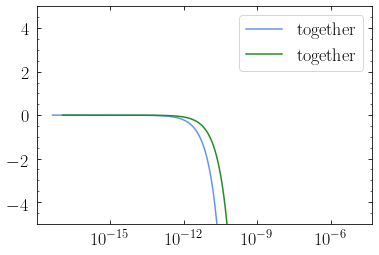

In [5]:
im1 = 30
im2 = 39

plt.plot(intens[im1], LLs[im1]-LLs[im1][0], label="together")
plt.plot(intens[im2], LLs[im2]-LLs[im2][0], label="together")
plt.ylim(-5,5)
plt.legend()
plt.xscale("log")

In [6]:
limit_data = np.zeros(40)

for en in range(40):
    TS_data = 2*(LLs[en]-LLs[en,0])
    max_arg= np.argmax(TS_data)
    max_val = TS_data[max_arg]
    for xi in range(max_arg,len(intens[en])):
        val = TS_data[xi]-max_val
        if val < -2.71:
            limit_data[en] = intens[en][xi]
            break

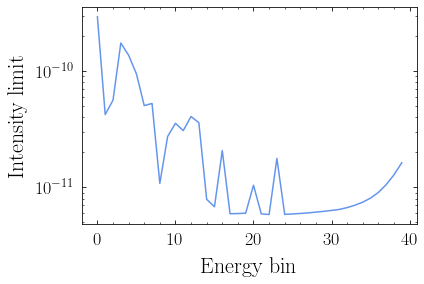

In [18]:
plt.plot(range(40),limit_data)
plt.ylabel("Intensity limit")
plt.xlabel('Energy bin')
plt.yscale("log")

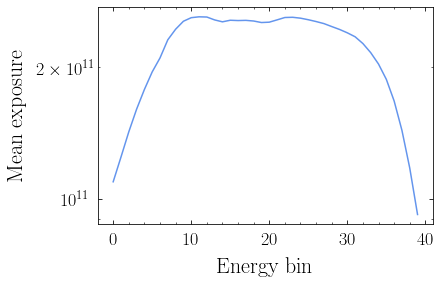

In [19]:
plt.plot(range(40),np.load("expmean.npy"))
plt.ylabel("Mean exposure")
plt.xlabel("Energy bin")
plt.yscale("log")

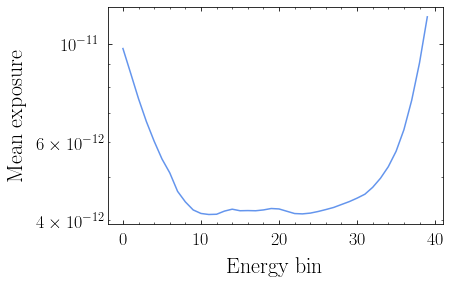

In [20]:
plt.plot(range(40),np.load("dmint.npy"))
plt.ylabel("Mean exposure")
plt.xlabel("Energy bin")
plt.yscale("log")

In [24]:
range(0,10,1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
range(0,25,25) + range(25,225,10) + range(225,550,50)

[0,
 25,
 35,
 45,
 55,
 65,
 75,
 85,
 95,
 105,
 115,
 125,
 135,
 145,
 155,
 165,
 175,
 185,
 195,
 205,
 215,
 225,
 275,
 325,
 375,
 425,
 475,
 525]

In [22]:
[i for j in (range(0,25,25),range(25,225,10),range(225, 275, 25),range(275,550,50)) for i in j]

[0,
 25,
 35,
 45,
 55,
 65,
 75,
 85,
 95,
 105,
 115,
 125,
 135,
 145,
 155,
 165,
 175,
 185,
 195,
 205,
 215,
 225,
 250,
 275,
 325,
 375,
 425,
 475,
 525]